In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
california = fetch_california_housing()

In [3]:
# Convert to DataFrame
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseValue")

In [4]:
# Combine into one DataFrame for easy analysis
df = pd.concat([X, y], axis=1)

In [5]:
print(df.head())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154

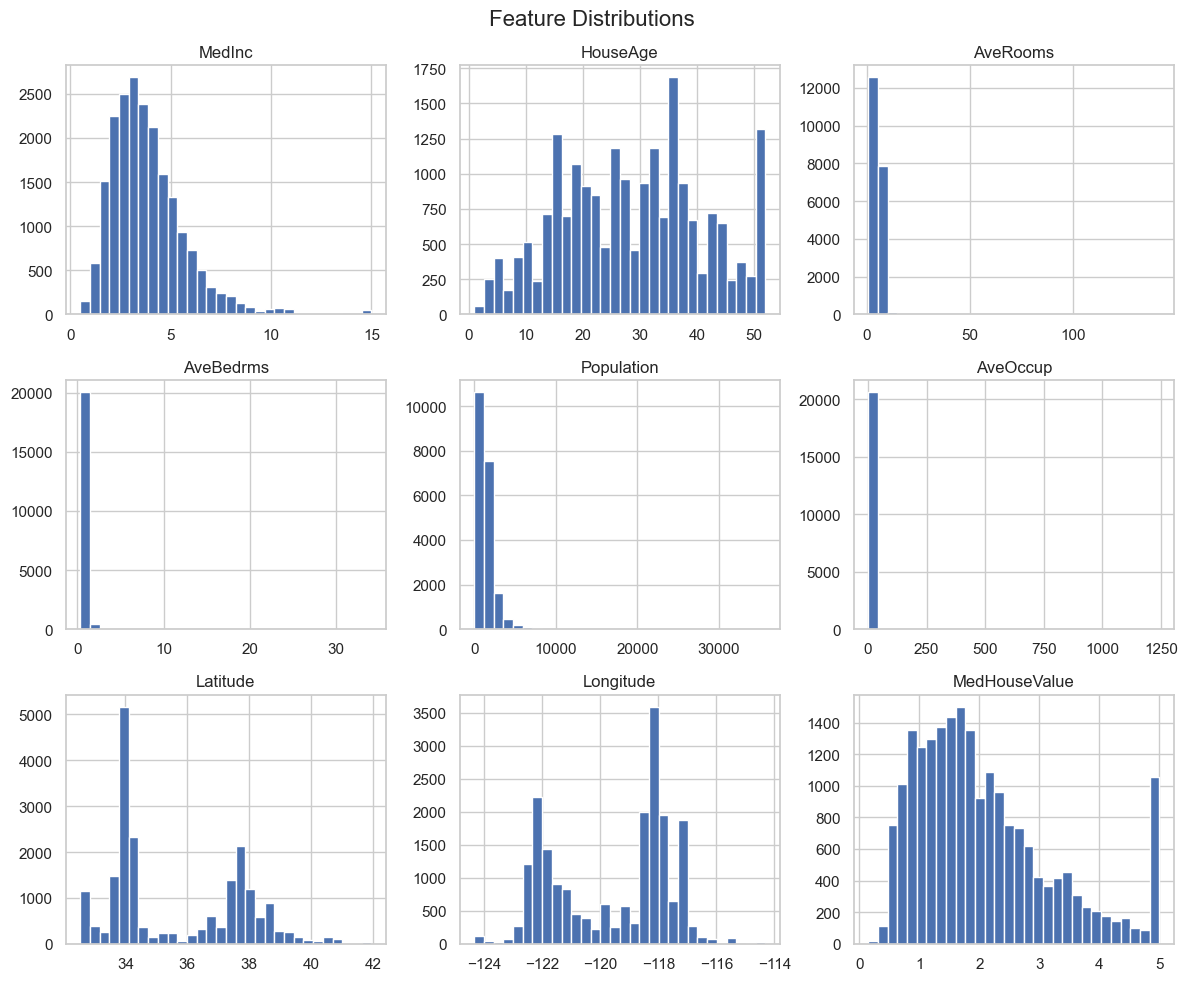

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histograms for all features
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


In [7]:
# Drop target column from df to get feature matrix X
X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

In [8]:
print("Mean after scaling:", X_scaled.mean(axis=0))
print("Std after scaling:", X_scaled.std(axis=0))

Mean after scaling: [ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
Std after scaling: [1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (16512, 8), Test shape: (4128, 8)


In [10]:
# Initialize the model
model = LinearRegression()

In [11]:
# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]
Intercept: 2.067862309508389


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on train set
y_train_pred = model.predict(X_train)

# Evaluate on train set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Performance:")
print(f"MAE: {mae_train:.3f}, MSE: {mse_train:.3f}, R²: {r2_train:.3f}")



Training Performance:
MAE: 0.529, MSE: 0.518, R²: 0.613


In [14]:


# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 0.533
Mean Squared Error (MSE): 0.556
R² Score: 0.576


In [21]:
new_sample = np.array([[ 
    3.2,    # MedInc (×10k USD)
    25.0,   # HouseAge (years)
    5.5,    # AveRooms
    1.2,    # AveBedrms
    1500,   # Population
    3.0,    # AveOccup
    34.0,   # Latitude
   -118.2   # Longitude
]])
# Define column names
columns = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
    'Population', 'AveOccup', 'Latitude', 'Longitude'
]

# Create DataFrame from new sample
new_sample_df = pd.DataFrame(new_sample, columns=columns)

# Scale and predict
new_sample_scaled = scaler.transform(new_sample_df)
predicted_value = model.predict(new_sample_scaled)

print(f"Predicted MedHouseValue: {predicted_value[0]:.3f} (×100k USD)")


Predicted MedHouseValue: 1.895 (×100k USD)


In [15]:
import joblib

# Save the trained model
joblib.dump(model, 'linear_model.pkl')

# Save the scaler too (since input to model is scaled)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [16]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']